In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image_paths = ['/content/line and circle.png', '/content/CurvedRoad.jpgg']

Successfully loaded /content/line and circle.png


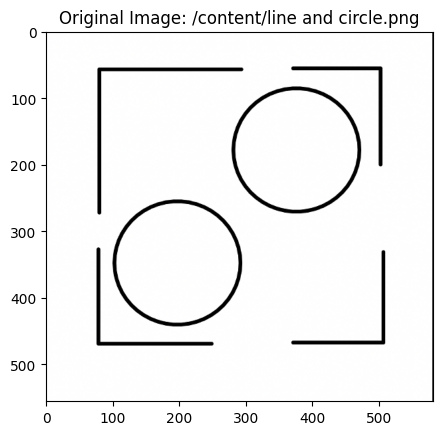

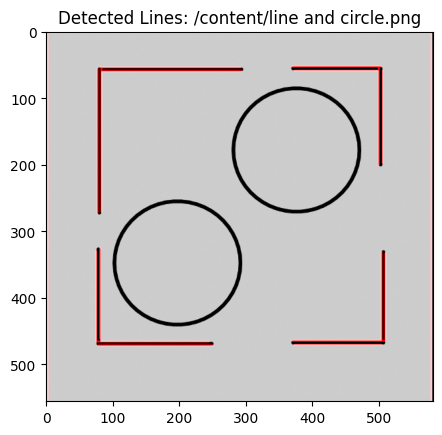

Error: Could not load the image /content/CurvedRoad.jpgg. Check the file name and path.


In [ ]:
for img_path in image_paths:
    # Read the Image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not load the image {img_path}. Check the file name and path.")
        continue
    else:
        print(f"Successfully loaded {img_path}")

    # Display the Original Image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Original Image: {img_path}")
    plt.show()

    # Convert to Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (11, 11), 0)  # Apply Gaussian Blur

    # Perform Edge Detection
    edges = cv2.Canny(gray, 50, 150)

    # Detect Lines Using Hough Transform
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

    # Draw Detected Lines
    line_image = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Overlay Detected Lines
    result = cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 0.8, line_image, 1, 1)

    # Display the Result
    plt.imshow(result)
    plt.title(f"Detected Lines: {img_path}")
    plt.show()